<a href="https://colab.research.google.com/github/sarjakpatel/AIRoyal/blob/master/AirQualityPredictionUsingPCA%26FeedForward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

In [97]:
data = pd.read_excel('/content/AirQualityUCI.xlsx')
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [98]:
data=data[data['NMHC(GT)']!=200]
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=data.drop(['Date', 'Time','AH'], axis=1)

x=scaler.fit_transform(x)

y=data.AH
#y=scaler.fit_transform(y)
#print(y)


In [100]:
from sklearn.decomposition import PCA
pca=PCA(n_components=12)
x_new = pca.fit_transform(x)
x_new
pca.get_covariance()

array([[ 1.34330108e-01,  2.23041857e-03,  4.72537378e-03,
        -1.80605347e-03,  1.55368641e-03,  2.95864654e-02,
        -3.68439453e-03,  5.78555018e-02, -4.24776588e-03,
         4.93523798e-03, -4.46540332e-03, -3.13707184e-03],
       [ 2.23041857e-03,  2.16847264e-02,  2.51249752e-03,
         1.97027786e-02,  1.94864609e-02,  6.27797564e-03,
         1.42973917e-03,  5.33332981e-03,  1.95445085e-02,
         2.20537535e-02,  1.96354558e-02,  1.94729406e-02],
       [ 4.72537378e-03,  2.51249752e-03,  1.01163013e-02,
         5.87335503e-04,  1.56777249e-03, -6.88107016e-05,
         5.48308225e-04,  2.44101416e-03,  2.56564960e-03,
         1.70142579e-03, -1.81548191e-06,  1.46441471e-04],
       [-1.80605347e-03,  1.97027786e-02,  5.87335503e-04,
         2.46214512e-02,  1.70765823e-02, -2.81352312e-05,
         8.97678049e-03, -4.05905712e-04,  1.90896351e-02,
         1.68876718e-02,  2.69245423e-02,  2.57511223e-02],
       [ 1.55368641e-03,  1.94864609e-02,  1.5677724

In [101]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([4.26353128e-01, 3.51407657e-01, 1.08585990e-01, 4.84406547e-02,
       2.62940098e-02, 1.76769925e-02, 7.02726719e-03, 6.41094039e-03,
       3.97451396e-03, 2.14747451e-03, 1.55857981e-03, 1.22792943e-04])

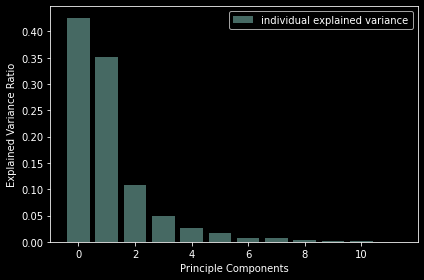

In [102]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(6,4))

  plt.bar(range(12), explained_variance, alpha=0.5, align = 'center', label = 'individual explained variance')
  plt.ylabel('Explained Variance Ratio')
  plt.xlabel('Principle Components')
  plt.legend(loc='best')
  plt.tight_layout()

In [108]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import backend as k

In [109]:
def model_fit(n):
  print(n)
  pca=PCA(n_components=n)
  x_new = pca.fit_transform(x)

  x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=0.2,random_state=0)

  model = Sequential()
  model.add(Dense(300, input_shape=(n,),activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(1, activation='linear'))
  model.compile(Adam(lr=0.1),loss='mean_squared_error')
  model.summary()
  history=model.fit(x_train, y_train, epochs = 20)
  return history

In [110]:
historyList=[]
for i in range(1,13):
  k.clear_session()
  historyList.append(model_fit(i))

1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               600       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 30,801
Trainable params: 30,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
234/234 [==============================] - 0s 2ms/step - loss: 1561.1980
Epoch 2/20
234/234 [==============================] - 0s 2ms/step - loss: 1551.9456
Epoch 3/20
234/234 [==============================] - 0s 2ms/step - loss: 1551.4768
Epoch 4/20
234/234 [==============================] - 0s 2ms/step - loss: 1551.3762
Epoch 5/20
234/234 [========================

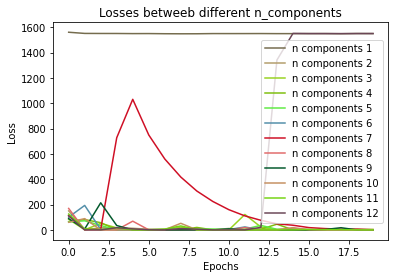

In [111]:
import random
epochs = range(0,20)
n=1
for history in historyList: 
  
  r = random.random()
  b = random.random()
  g = random.random()
  color = (r, g, b)
  loss_train = history.history['loss']
  plt.plot(epochs, loss_train, c=color, label='n components '+str(n))
  n=n+1


plt.title('Losses betweeb different n_components')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()